In [28]:
import os, yaml, sys
import cv2
import numpy as np
from retinaface import RetinaFace
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from image_processing.utils import read_video, load_stimuli_models, get_video_dimensions


In [30]:
fn = "IMG_4669.mp4"

In [31]:

v = read_video(paths, 1, fn)

11:52:23 - rank 1 IMG_4669.mp4 read successfully


In [32]:
vid_path = f"{paths['livingstone_lab']}/Stimuli/Movies/all_videos/{fn}"
cap = cv2.VideoCapture(vid_path)
fps = cap.get(cv2.CAP_PROP_FPS)
h, w, _ = get_video_dimensions(cap)
new_h, new_w = round(h*.1), round(w*.1)

In [33]:
models_path = f"{paths['livingstone_lab']}/tiziano/models"
model_name = "dgIIE"
curr_model = np.load(f"{models_path}/{model_name}_{fn[:-4]}.npz")['data']



In [34]:
mod = np.reshape(curr_model, (new_h, new_w, -1), order="F")

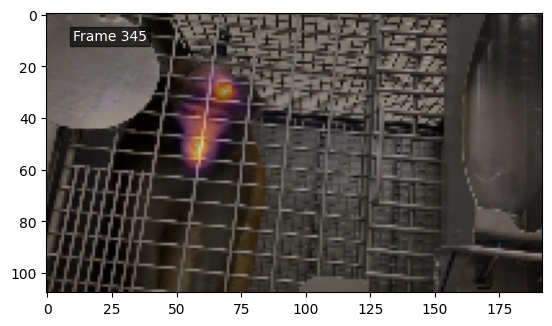

In [51]:
for i in range(v.shape[0]):
    img = v[i,:,:,:].copy()
    img = cv2.resize(img, (new_w, new_h))
    fr = mod[:,:,i].copy()
    # fr = fr.astype(np.float32)
    # fr = cv2.resize(fr, (w, h))
    plt.imshow(img)
    plt.imshow(fr, alpha=.4, cmap="inferno")
    plt.text(
    10, 10,                  # x, y coordinates
    f"Frame {i}",               # text
    color='white',           # text color
    fontsize=10,             # font size
    bbox=dict(               # background box
        facecolor='black',   # box color
        alpha=0.6,           # transparency
        pad=2                # padding around text
    )
)
    plt.pause(.01*1/fps)
    clear_output(wait=True)
    
    

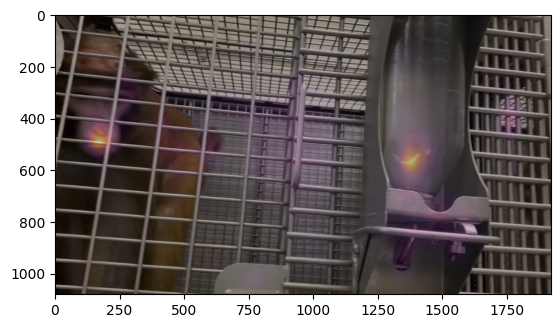

In [67]:
i=303
img = v[i,:,:,:].copy()
#img = cv2.resize(img, (new_w, new_h))
fr = mod[:,:,i].copy()
fr = fr.astype(np.float32)
fr = cv2.resize(fr, (w, h))
plt.imshow(img)
plt.imshow(fr, alpha=.3, cmap="inferno")
clear_output(wait=True)

In [43]:
fr.dtype

dtype('float16')